In [1]:
print("hii")

hii


In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot.tf_keras import PlotLossesCallback
import os
import pandas as pd
import numpy as np
import os
from tkinter import *
from tkinter import messagebox
from PIL import ImageTk,Image

2024-08-29 19:14:26.145330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 19:14:26.145469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 19:14:26.288337: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'livelossplot'

In [26]:
TRAIN_DIR = '/kaggle/input/fer2013/test'
TEST_DIR = '/kaggle/input/fer2013/train'

In [27]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [28]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [29]:
print(train)

                                              image     label
0     /kaggle/input/fer2013/test/surprise/13288.jpg  surprise
1     /kaggle/input/fer2013/test/surprise/24201.jpg  surprise
2     /kaggle/input/fer2013/test/surprise/26556.jpg  surprise
3     /kaggle/input/fer2013/test/surprise/26076.jpg  surprise
4     /kaggle/input/fer2013/test/surprise/27577.jpg  surprise
...                                             ...       ...
7497     /kaggle/input/fer2013/test/happy/24492.jpg     happy
7498     /kaggle/input/fer2013/test/happy/13877.jpg     happy
7499      /kaggle/input/fer2013/test/happy/7674.jpg     happy
7500      /kaggle/input/fer2013/test/happy/5303.jpg     happy
7501     /kaggle/input/fer2013/test/happy/31858.jpg     happy

[7502 rows x 2 columns]


In [30]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [31]:
print(test)
print(test['image'])

                                                image     label
0      /kaggle/input/fer2013/train/surprise/30778.jpg  surprise
1      /kaggle/input/fer2013/train/surprise/22706.jpg  surprise
2      /kaggle/input/fer2013/train/surprise/20513.jpg  surprise
3      /kaggle/input/fer2013/train/surprise/27582.jpg  surprise
4      /kaggle/input/fer2013/train/surprise/33678.jpg  surprise
...                                               ...       ...
28927     /kaggle/input/fer2013/train/happy/33570.jpg     happy
28928     /kaggle/input/fer2013/train/happy/21432.jpg     happy
28929      /kaggle/input/fer2013/train/happy/8658.jpg     happy
28930      /kaggle/input/fer2013/train/happy/3361.jpg     happy
28931     /kaggle/input/fer2013/train/happy/10035.jpg     happy

[28932 rows x 2 columns]
0        /kaggle/input/fer2013/train/surprise/30778.jpg
1        /kaggle/input/fer2013/train/surprise/22706.jpg
2        /kaggle/input/fer2013/train/surprise/20513.jpg
3        /kaggle/input/fer2013/train/s

In [32]:
from tqdm.notebook import tqdm

In [33]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [34]:
train_features = extract_features(train['image']) 

  0%|          | 0/7502 [00:00<?, ?it/s]

In [35]:
test_features = extract_features(test['image'])

  0%|          | 0/28932 [00:00<?, ?it/s]

In [36]:
x_train = train_features/255.0 
x_test = test_features/255.0

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [39]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [40]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [42]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(TRAIN_DIR,target_size=(img_size,img_size),color_mode='grayscale'
                                                    , batch_size= batch_size , class_mode = 'categorical',shuffle = 'True')


validation_generator = datagen_train.flow_from_directory(TEST_DIR,target_size=(img_size,img_size) , color_mode=
                                                    'grayscale' , batch_size= batch_size , class_mode = 
                                                    'categorical',shuffle = 'False')

Found 7502 images belonging to 7 classes.
Found 28932 images belonging to 7 classes.


In [71]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
import tensorflow as tf

In [68]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam',lr=1e-3)
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 24, 24, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,787,015 (10.63 MB)

 Trainable params: 2,785,863 (10.63 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [89]:
path_model='model_filter.keras' # save model at this location after each epoch
tf.keras.backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
steps_per_epoch = train_generator.n//train_generator.batch_size    
validation_steps = validation_generator.n//validation_generator.batch_size
# tf.keras.backend.set_value(model.optimizer) # set the learning rate
# fit the model
callbacks = [PlotLossesCallback(),ModelCheckpoint(filepath=path_model)]

h=model.fit(x = train_generator ,
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            #validation_data=(X_test,y_test),
            shuffle=True,
            callbacks = callbacks,
            #x = train_generator,
            steps_per_epoch= steps_per_epoch,
            #epochs = epochs,
            validation_data = validation_generator
            validation_steps= validation_steps, 
            #callbacks = callbacks
)


Epoch 1/20
  4/118 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.0892 - loss: 2.7637 

W0000 00:00:1717931432.431105     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 41/118 ━━━━━━━━━━━━━━━━━━━━ 18s 243ms/step - accuracy: 0.1784 - loss: 2.3700

W0000 00:00:1717931442.010145     283 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.2209 - loss: 2.1525

W0000 00:00:1717931447.105644     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


118/118 ━━━━━━━━━━━━━━━━━━━━ 58s 335ms/step - accuracy: 0.2214 - loss: 2.1495 - val_accuracy: 0.3017 - val_loss: 1.9907
Epoch 2/20


W0000 00:00:1717931471.535371     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 238ms/step - accuracy: 0.3279 - loss: 1.7687 - val_accuracy: 0.2627 - val_loss: 1.8332
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 250ms/step - accuracy: 0.3657 - loss: 1.6653 - val_accuracy: 0.2380 - val_loss: 2.0724
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 252ms/step - accuracy: 0.4176 - loss: 1.5442 - val_accuracy: 0.3808 - val_loss: 1.5783
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 257ms/step - accuracy: 0.4674 - loss: 1.4152 - val_accuracy: 0.4029 - val_loss: 1.5360
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.5105 - loss: 1.3019 - val_accuracy: 0.4449 - val_loss: 1.4519
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 261ms/step - accuracy: 0.5557 - loss: 1.2051 - val_accuracy: 0.4585 - val_loss: 1.3887
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 29s 247ms/step - accuracy: 0.5973 - loss: 1.1012 - val_accuracy: 0.4658 - val_loss: 1.4016
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 29s 245ms/step - accuracy: 0.6267 - loss: 1.0143 - val

In [106]:
model = Sequential()
# convolutional layers
model.add(Conv2D(64, kernel_size=(3,3),padding="same",
                  activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), 
                 padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3,3)
                 , padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3,3) , padding="same"
                 , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
# fully connected layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=1e-3)
                    

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.compile(optimizer = opt, loss = 'categorical_crossentropy',
               metrics = ['accuracy'] )
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,293,959 (4.94 MB)

 Trainable params: 1,291,783 (4.93 MB)

 Non-trainable params: 2,176 (8.50 KB)

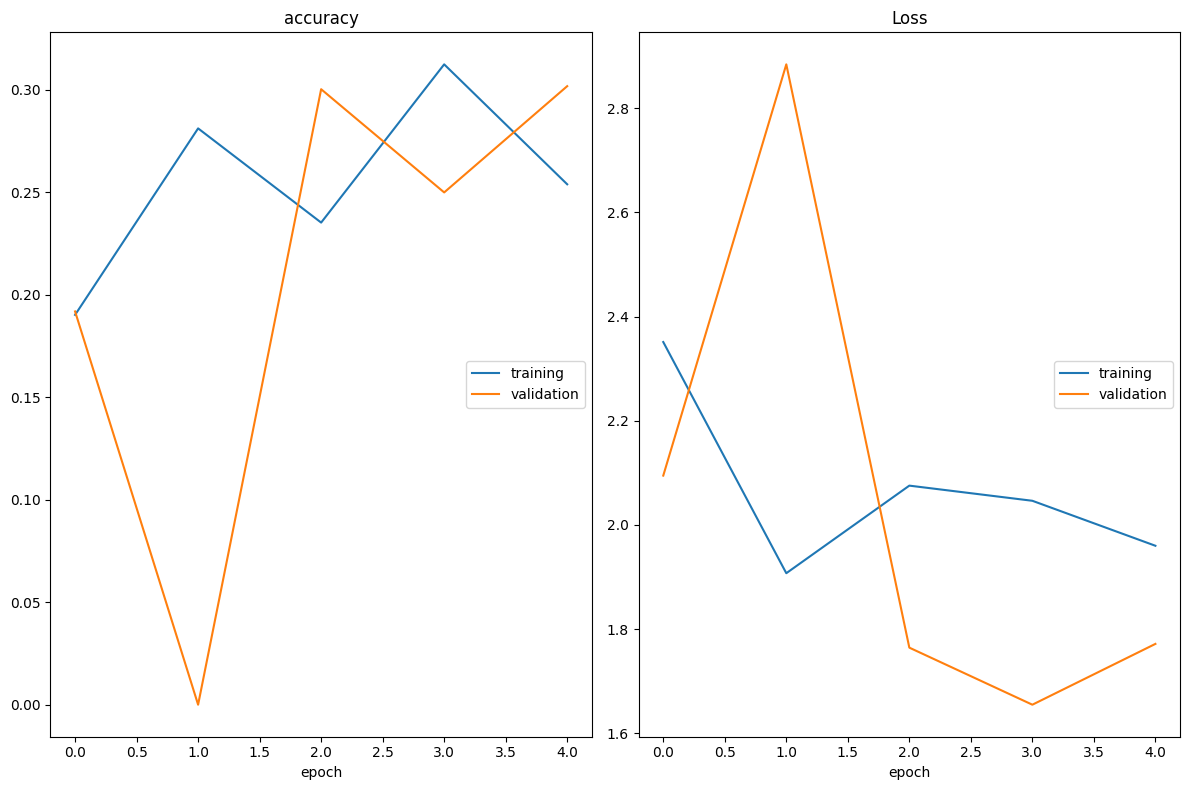

accuracy
	training         	 (min:    0.190, max:    0.312, cur:    0.254)
	validation       	 (min:    0.000, max:    0.302, cur:    0.302)
Loss
	training         	 (min:    1.907, max:    2.351, cur:    1.960)
	validation       	 (min:    1.655, max:    2.884, cur:    1.772)

Epoch 5: accuracy did not improve from 0.31250
117/117 ━━━━━━━━━━━━━━━━━━━━ 33s 278ms/step - accuracy: 0.2515 - loss: 1.9564 - val_accuracy: 0.3019 - val_loss: 1.7718 - learning_rate: 1.0000e-04


In [108]:
epochs = 5
steps_per_epoch = train_generator.n//train_generator.batch_size    
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5",monitor="accuracy",save_best_only = True,
                             save_weights_only = True,
                             mode = 'auto',
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor="loss",factor=0.1,patience=2,min_lr=0.00001,mode = 'auto')

callbacks = [PlotLossesCallback(),checkpoint,reduce_lr]

history = model.fit(
    x = train_generator,
    steps_per_epoch= steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps= validation_steps, 
    callbacks = callbacks
)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

In [ ]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [98]:
model_json = model.to_json()
with open("model_json.json",'w') as json_file:
    json_file.write(model_json)
model.save("model_json.keras")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

  saving_api.save_model(


In [96]:
from keras.models import model_from_json

In [97]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [104]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [26]:
image = 'images/train/angry/0.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"

  warnings.warn(


1/1 [==============================] - 0s 360ms/step

model prediction is  angry


In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
image = '/kaggle/input/fer2013/test/sad/10004.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
(48, 48, 3)


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_1/max_pooling2d_1_2/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1/batch_normalization_1_2/batchnorm/add_1)' with input shapes: [32,24,1,128].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(32, 24, 1, 128), dtype=float32)

In [97]:
image = '/kaggle/input/fer2013/test/sad/10004.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear


ValueError: cannot reshape array of size 6912 into shape (1,48,48,1)

original image is of disgust

1/1 [==============================] - 0s 98ms/step

model prediction is  disgust


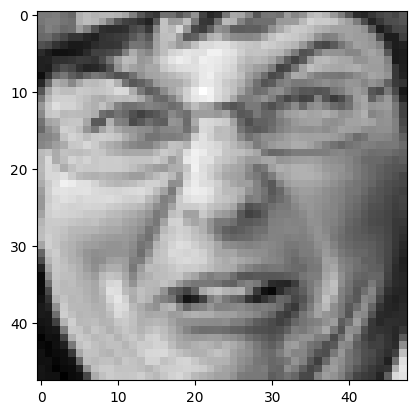

In [31]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy

1/1 [==============================] - 0s 434ms/step

model prediction is  happy


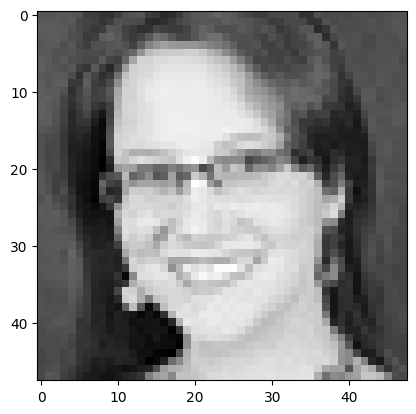

In [31]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise

1/1 [==============================] - 0s 95ms/step

model prediction is  surprise


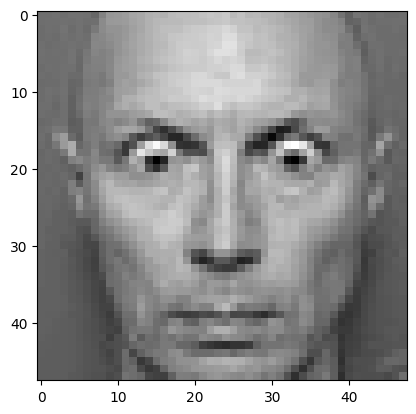

In [32]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')